# LOAN RISK ANALYSIS

In [1]:
import pandas as pd
import numpy as np

### Loading the train Dataset

In [2]:
df_train=pd.read_csv('Assignment_Train.csv')

In [3]:
df_train.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [4]:
target='Application Status'

### Droping the target Variable

In [5]:
df1=df_train.drop(columns=[target])


In [6]:
df1.shape

(10000, 54)

### Loading the test dataset

In [7]:
df_test=pd.read_csv('Assignment_Test.csv')

In [8]:
df_test.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


### Droping the UID column

In [9]:
df2=df_test.drop(columns=['UID'])

In [10]:
df2.shape

(2000, 54)

### Concatinating the train and test data for Data Preprocessing

In [11]:
df= pd.concat([df1, df2], ignore_index=True)

In [12]:
df.shape

(12000, 54)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            12000 non-null  int64  
 1   APPLICATION LOGIN DATE               12000 non-null  object 
 2   HDB BRANCH NAME                      11999 non-null  object 
 3   HDB BRANCH STATE                     10974 non-null  object 
 4   FIRST NAME                           12000 non-null  object 
 5   MIDDLE NAME                          3450 non-null   object 
 6   LAST NAME                            11188 non-null  object 
 7   mobile                               12000 non-null  int64  
 8   AADHAR VERIFIED                      12000 non-null  object 
 9   Cibil Score                          6861 non-null   object 
 10  MOBILE VERIFICATION                  12000 non-null  bool   
 11  DEALER NAME                 

### Checking for the null Values

In [14]:
df.isnull().sum()[:28]

DEALER ID                    0
APPLICATION LOGIN DATE       0
HDB BRANCH NAME              1
HDB BRANCH STATE          1026
FIRST NAME                   0
MIDDLE NAME               8550
LAST NAME                  812
mobile                       0
AADHAR VERIFIED              0
Cibil Score               5139
MOBILE VERIFICATION          0
DEALER NAME                  4
TOTAL ASSET COST          6130
ASSET CTG                 6130
ASSET MODEL NO               0
APPLIED AMOUNT               0
PRIMARY ASSET MAKE           0
Primary Asset Model No       0
Personal Email Address       0
MARITAL STATUS            5875
GENDER                       0
DOB                          0
AGE                          0
ADDRESS TYPE              3947
EMPLOY CONSTITUTION       5992
EMPLOYER NAME             6005
EMPLOYER TYPE             5992
Pan Name                  1262
dtype: int64

In [15]:
df.isnull().sum()[28:]

name                                       0
vpa                                     3341
upi_name                                3344
Phone Social Premium.a23games          11999
Phone Social Premium.amazon             2033
Phone Social Premium.byjus              1971
Phone Social Premium.flipkart           1877
Phone Social Premium.housing            1799
Phone Social Premium.indiamart          1798
Phone Social Premium.instagram          8018
Phone Social Premium.isWABusiness      10165
Phone Social Premium.jeevansaathi       1867
Phone Social Premium.jiomart           11547
Phone Social Premium.microsoft          1901
Phone Social Premium.my11              11998
Phone Social Premium.paytm              1782
Phone Social Premium.rummycircle       11999
Phone Social Premium.shaadi             1805
Phone Social Premium.skype              1811
Phone Social Premium.toi                2007
Phone Social Premium.whatsapp          10165
Phone Social Premium.yatra             11991
Phone Soci

#### Some of the Phone Social Premium columns cantains about 95% of the null values So I am Droping them

In [16]:
df = df.drop(columns=['Phone Social Premium.a23games', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jiomart',
                      'Phone Social Premium.my11','Phone Social Premium.rummycircle','Phone Social Premium.whatsapp','Phone Social Premium.yatra'])

### Droping the features which are not so important

In [17]:
features_to_exclude = ['APPLICATION LOGIN DATE','DEALER ID','FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'Personal Email Address', 'mobile',  'DEALER NAME',
      'HDB BRANCH NAME', 'EMPLOYER NAME','HDB BRANCH STATE']

In [18]:
df = df.drop(columns=features_to_exclude)

In [19]:
df.columns

Index(['AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.microsoft',
       'Phone Social Premium.paytm', 'Phone Social Premium.shaadi',
       'Phone Social Premium.skype', 'Phone Social Premium.toi',
       'Phone Social Premium.zoho', 'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall'],
      dtype='object')

In [20]:
df=df.drop(columns=['vpa','Pan Name','name','upi_name'])

### Creating another feature for social meadia count

In [21]:
social_media_columns = [col for col in df.columns if col.startswith('Phone Social Premium')]
df['SOCIAL_MEDIA_COUNT'] = df[social_media_columns].sum(axis=1)

In [22]:
df['SOCIAL_MEDIA_COUNT'].head()

0    5.0
1    5.0
2    2.0
3    6.0
4    5.0
Name: SOCIAL_MEDIA_COUNT, dtype: float64

In [23]:
df.isnull().sum()

AADHAR VERIFIED                           0
Cibil Score                            5139
MOBILE VERIFICATION                       0
TOTAL ASSET COST                       6130
ASSET CTG                              6130
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
MARITAL STATUS                         5875
GENDER                                    0
DOB                                       0
AGE                                       0
ADDRESS TYPE                           3947
EMPLOY CONSTITUTION                    5992
EMPLOYER TYPE                          5992
Phone Social Premium.amazon            2033
Phone Social Premium.byjus             1971
Phone Social Premium.flipkart          1877
Phone Social Premium.housing           1799
Phone Social Premium.indiamart         1798
Phone Social Premium.instagram         8018
Phone Social Premium.jeevansaath

In [24]:
import seaborn as sns

### ploting the data distribution for TOTAL ASSET COSR

<Axes: xlabel='TOTAL ASSET COST', ylabel='Count'>

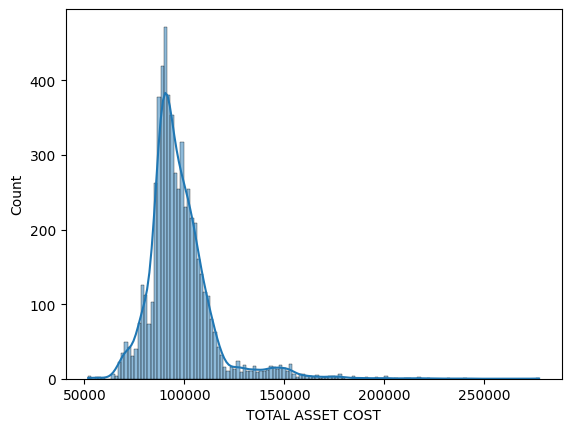

In [25]:
sns.histplot(df['TOTAL ASSET COST'],kde=True)

### data is skewed towerds left and is not best idea filling the nan values with mean and also is not a best idea for droping the data points as it contains around 50% of the data so I am filling it with median

In [26]:
df['TOTAL ASSET COST'].fillna(df['TOTAL ASSET COST'].median(), inplace=True)

In [27]:
df['ASSET CTG'].head()

0    MCEXA
1      NaN
2    SCEXA
3    MCECA
4      NaN
Name: ASSET CTG, dtype: object

### ploting the data distribution for ASSET Catogory

<Axes: xlabel='ASSET CTG', ylabel='Count'>

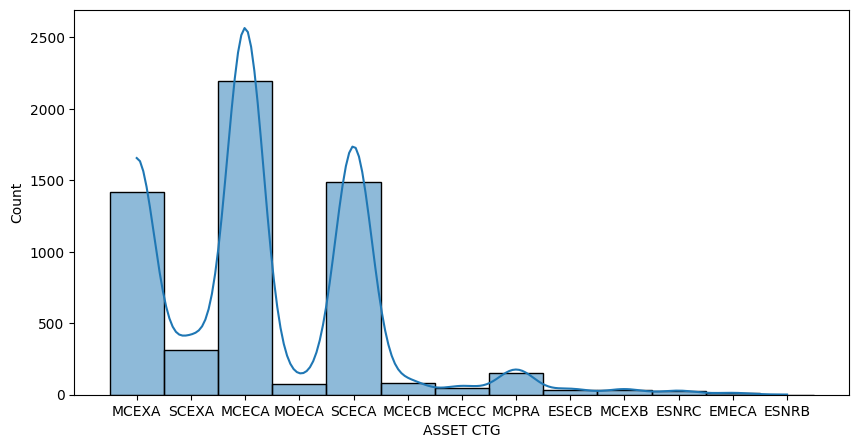

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(df['ASSET CTG'],kde=True)

### from the above plot i decided to fill the nan values with mode

In [29]:

df['ASSET CTG'].fillna(df['ASSET CTG'].mode()[0], inplace=True)

In [30]:
df['EMPLOY CONSTITUTION'].isnull().sum()

5992

In [31]:
df['EMPLOY CONSTITUTION'].value_counts()

EMPLOY CONSTITUTION
SELF-EMPLOYED    4180
SALARIED         1828
Name: count, dtype: int64

### I filled nan values for EMPLOY CONSTITUTION as 'Unknown'

In [32]:
df['EMPLOY CONSTITUTION'].fillna('Unknown', inplace=True)

In [33]:
df['MARITAL STATUS'].isnull().sum()

5875

In [34]:
df['MARITAL STATUS'].value_counts()

MARITAL STATUS
Married    4597
Single     1528
Name: count, dtype: int64

### I filled nan values for MARITAL STATUS as 'Unknown'

In [35]:
df['MARITAL STATUS'].fillna(df['MARITAL STATUS'].mode()[0], inplace=True)

### ploting the data distribution for cibil score

<Axes: xlabel='Cibil Score', ylabel='Count'>

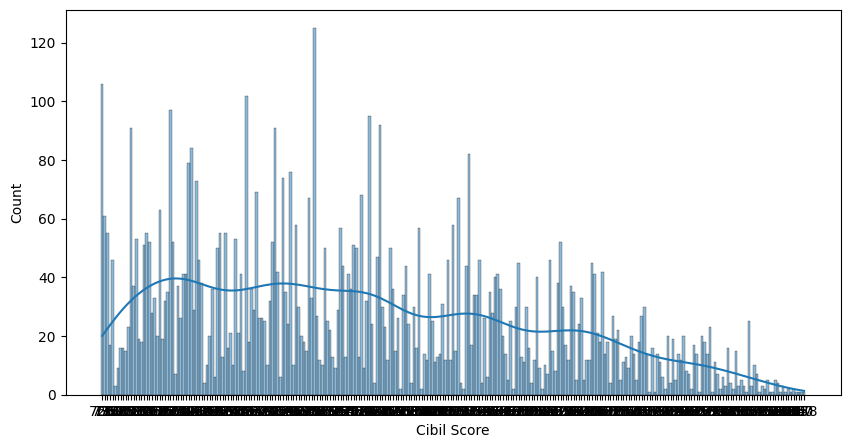

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(df['Cibil Score'],kde=True)

In [37]:
df['Cibil Score'].isnull().sum()

5139

### I used KNNImputer for cibil score column for filling the nan values

In [38]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Cibil Score'] = pd.to_numeric(df['Cibil Score'], errors='coerce')
df['Cibil Score'] = imputer.fit_transform(df[['Cibil Score']])

### ploting the data distribution for ADDRESS TYPE

<Axes: xlabel='ADDRESS TYPE', ylabel='Count'>

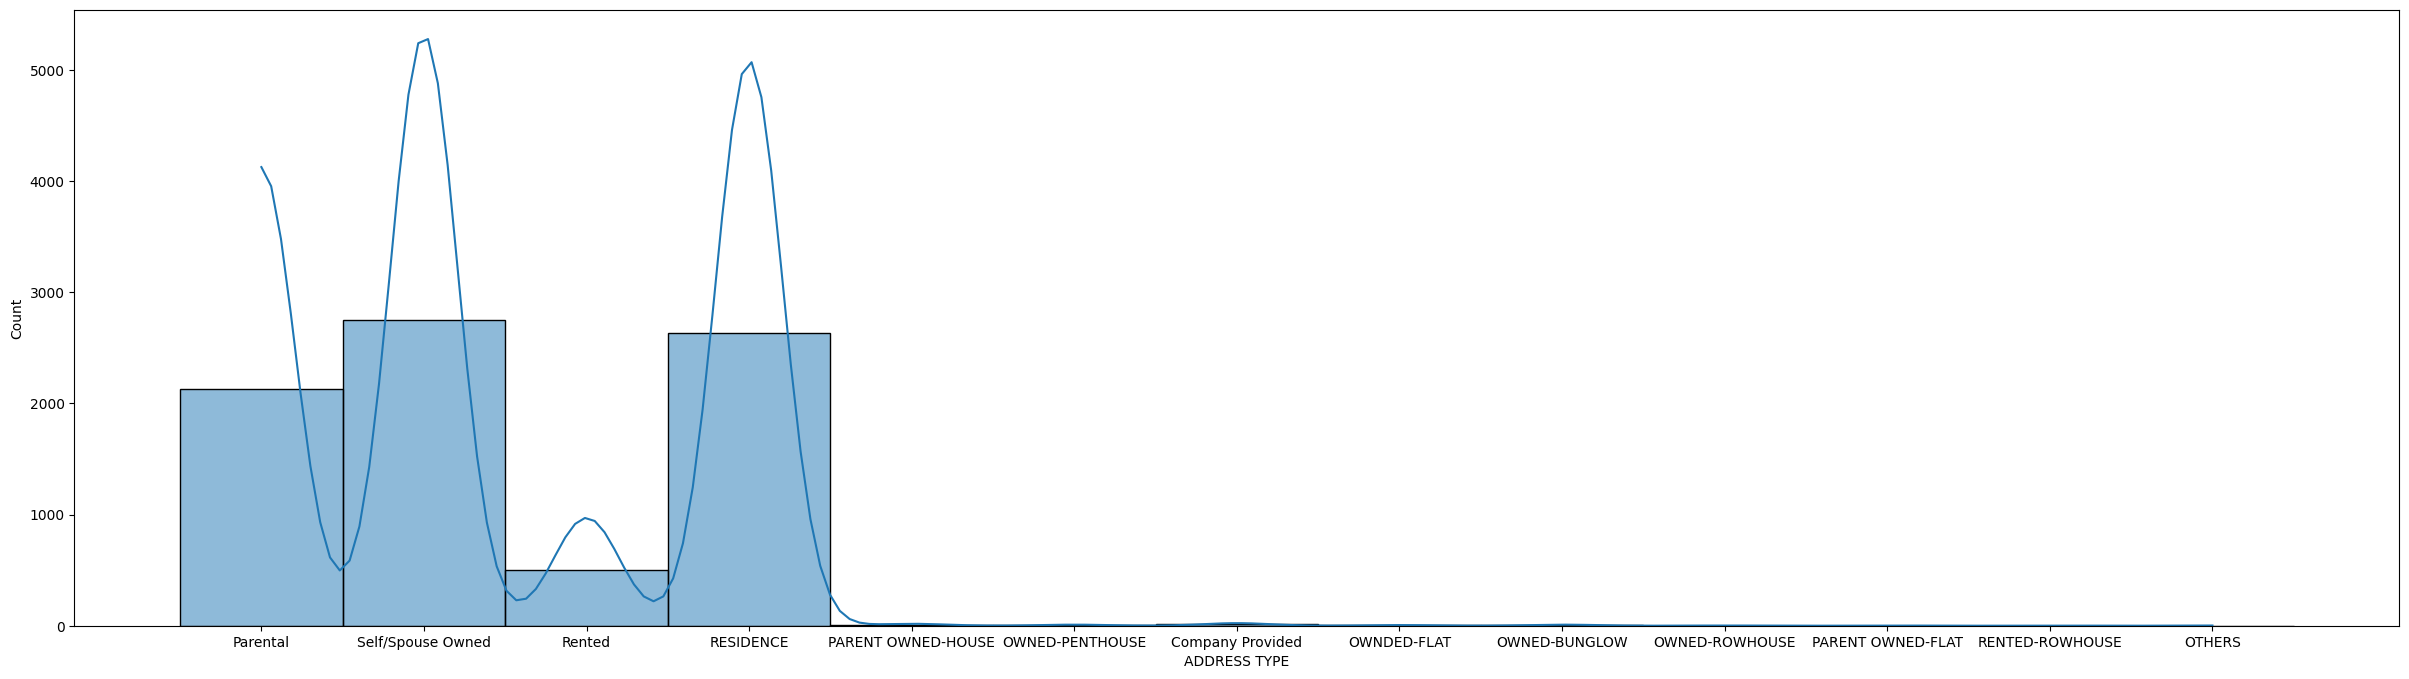

In [39]:
plt.figure(figsize=(30,8))
sns.histplot(df['ADDRESS TYPE'],kde=True)

In [40]:
df['ADDRESS TYPE'].isnull().sum()

3947

In [41]:
df['ADDRESS TYPE'].value_counts()

ADDRESS TYPE
Self/Spouse Owned     2750
RESIDENCE             2629
Parental              2134
Rented                 502
Company Provided        12
PARENT OWNED-HOUSE       9
OWNED-PENTHOUSE          5
OWNED-BUNGLOW            5
OWNDED-FLAT              3
OWNED-ROWHOUSE           1
PARENT OWNED-FLAT        1
RENTED-ROWHOUSE          1
OTHERS                   1
Name: count, dtype: int64

### I have categorized ADDRES TYPE IN FIVE CATEGORIES BY USING THE BELOW METHOD

In [42]:
address_type_map = {
    'Self/Spouse Owned': 'OWNED',
    'OWNED-PENTHOUSE': 'OWNED',
    'OWNED-BUNGLOW': 'OWNED',
    'OWNDED-FLAT': 'OWNED',
    'OWNED-ROWHOUSE': 'OWNED',
    'RESIDENCE': 'RESIDENCE',
    'Parental': 'PARENTAL',
    'PARENT OWNED-HOUSE': 'PARENTAL',
    'PARENT OWNED-FLAT': 'PARENTAL',
    'Rented': 'RENTED',
    'RENTED-ROWHOUSE': 'RENTED',
    'Company Provided': 'COMPANY_PROVIDED',
    'OTHERS': 'COMPANY_PROVIDED'
}

In [43]:
df['ADDRESS TYPE'] = df['ADDRESS TYPE'].map(address_type_map)

In [44]:
df['ADDRESS TYPE'].value_counts()

ADDRESS TYPE
OWNED               2764
RESIDENCE           2629
PARENTAL            2144
RENTED               503
COMPANY_PROVIDED      13
Name: count, dtype: int64

<Axes: ylabel='ADDRESS TYPE'>

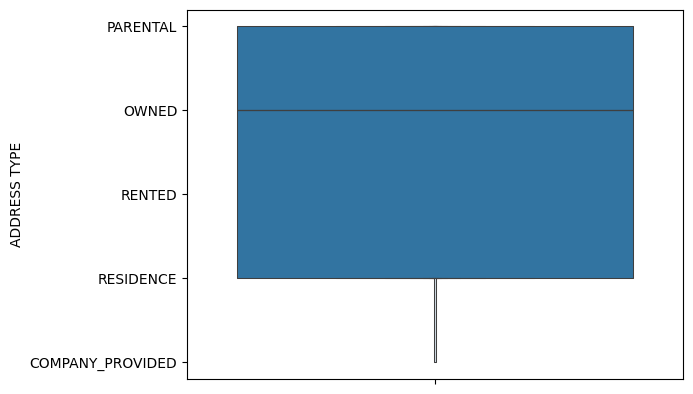

In [45]:
sns.boxenplot(df['ADDRESS TYPE'])

In [46]:
df['ADDRESS TYPE'].isnull().sum()

3947

### I have filled the nan values of address type with mode

In [47]:
df['ADDRESS TYPE'].fillna(df['ADDRESS TYPE'].mode()[0],inplace=True)

In [48]:
df['EMPLOYER TYPE'].head()

0         SALARIED
1              NaN
2    SELF-EMPLOYED
3    SELF-EMPLOYED
4              NaN
Name: EMPLOYER TYPE, dtype: object

In [49]:
df[['EMPLOYER TYPE','EMPLOY CONSTITUTION']].head()

,EMPLOYER TYPE,EMPLOY CONSTITUTION
0,SALARIED,SALARIED
1,NaN,Unknown
2,SELF-EMPLOYED,SELF-EMPLOYED
3,SELF-EMPLOYED,SELF-EMPLOYED
4,NaN,Unknown


### As EMPLOYER TYPE and EMPLOY CONSTITUTION are same so I am droping the EMPLOYER TYPE Column

In [50]:
df=df.drop(columns=['EMPLOYER TYPE'])

In [51]:
social_columns = ['Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
    'Phone Social Premium.indiamart', 'Phone Social Premium.instagram','Phone Social Premium.jeevansaathi', 'Phone Social Premium.microsoft',
    'Phone Social Premium.paytm', 'Phone Social Premium.shaadi','Phone Social Premium.skype', 'Phone Social Premium.toi',
    'Phone Social Premium.zoho']

In [52]:
df[social_columns].isnull().sum()

Phone Social Premium.amazon          2033
Phone Social Premium.byjus           1971
Phone Social Premium.flipkart        1877
Phone Social Premium.housing         1799
Phone Social Premium.indiamart       1798
Phone Social Premium.instagram       8018
Phone Social Premium.jeevansaathi    1867
Phone Social Premium.microsoft       1901
Phone Social Premium.paytm           1782
Phone Social Premium.shaadi          1805
Phone Social Premium.skype           1811
Phone Social Premium.toi             2007
Phone Social Premium.zoho            1805
dtype: int64

### for the above social columns i considerd they dont have the accounts and filling the nan values with 0

In [53]:
for col in social_columns:
    df[col].fillna(0, inplace=True)


In [54]:
df.isnull().sum()[10:]

GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
Phone Social Premium.amazon            0
Phone Social Premium.byjus             0
Phone Social Premium.flipkart          0
Phone Social Premium.housing           0
Phone Social Premium.indiamart         0
Phone Social Premium.instagram         0
Phone Social Premium.jeevansaathi      0
Phone Social Premium.microsoft         0
Phone Social Premium.paytm             0
Phone Social Premium.shaadi            0
Phone Social Premium.skype             0
Phone Social Premium.toi               0
Phone Social Premium.zoho              0
phone_digitalage                       4
phone_nameMatchScore                   4
phone_phoneFootprintStrengthOverall    7
SOCIAL_MEDIA_COUNT                     0
dtype: int64

### ploting a data distribution for Phone_digitalage

<Axes: xlabel='phone_digitalage', ylabel='Count'>

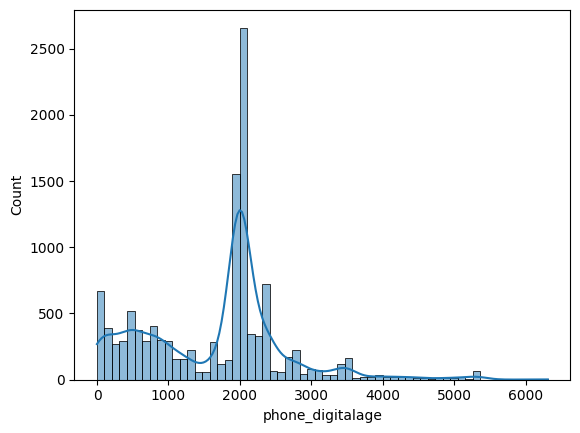

In [55]:
sns.histplot(df['phone_digitalage'],kde=True)

### Looking for Outliers

<Axes: ylabel='phone_digitalage'>

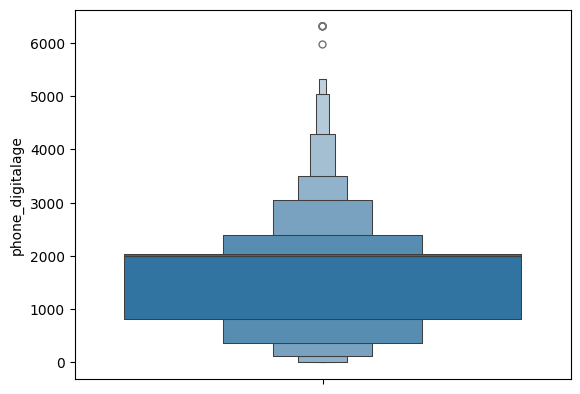

In [56]:
sns.boxenplot(df['phone_digitalage'])

In [57]:
df['phone_digitalage'].fillna(df['phone_digitalage'].median(),inplace=True)

### Handling the outliers

In [58]:
Q1 = df['phone_digitalage'].quantile(0.25)
Q3 = df['phone_digitalage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['phone_digitalage'] < lower_bound) | (df['phone_digitalage'] > upper_bound)]
median=df['phone_digitalage'].median()

In [59]:
outliers.shape

(281, 32)

In [60]:
df.loc[(df['phone_digitalage'] < lower_bound) | (df['phone_digitalage'] > upper_bound), 'phone_digitalage'] = median


In [61]:
df.shape

(12000, 32)

<Axes: ylabel='phone_digitalage'>

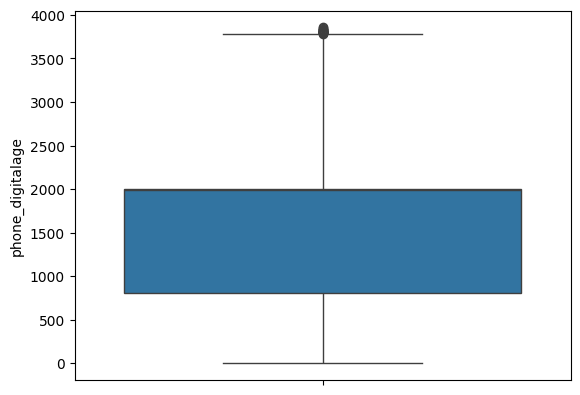

In [62]:
sns.boxplot(df['phone_digitalage'])

### ploting the data distribution for Phone_nameMatchScore

<Axes: xlabel='phone_nameMatchScore', ylabel='Count'>

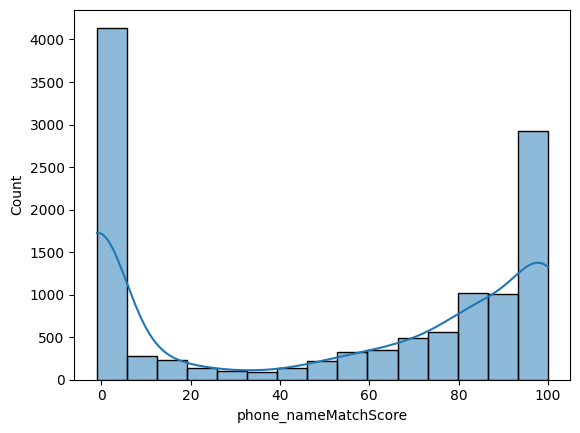

In [63]:
sns.histplot(df['phone_nameMatchScore'],kde=True)

<Axes: ylabel='phone_nameMatchScore'>

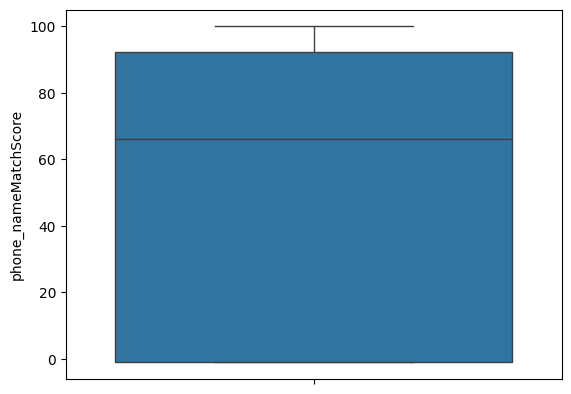

In [64]:
sns.boxplot(df['phone_nameMatchScore'])

In [65]:
df['phone_nameMatchScore'].isnull().sum()

4

In [66]:
df['phone_nameMatchScore'].fillna(df['phone_nameMatchScore'].median(),inplace=True)

In [67]:
df['phone_phoneFootprintStrengthOverall'].value_counts()

phone_phoneFootprintStrengthOverall
Medium       5278
High         4258
Low          2308
Very Low      102
Very High      47
Name: count, dtype: int64

In [68]:
df['phone_phoneFootprintStrengthOverall'].fillna(df['phone_phoneFootprintStrengthOverall'].mode()[0],inplace=True)

In [69]:
df.isnull().sum()

AADHAR VERIFIED                        0
Cibil Score                            0
MOBILE VERIFICATION                    0
TOTAL ASSET COST                       0
ASSET CTG                              0
ASSET MODEL NO                         0
APPLIED AMOUNT                         0
PRIMARY ASSET MAKE                     0
Primary Asset Model No                 0
MARITAL STATUS                         0
GENDER                                 0
DOB                                    0
AGE                                    0
ADDRESS TYPE                           0
EMPLOY CONSTITUTION                    0
Phone Social Premium.amazon            0
Phone Social Premium.byjus             0
Phone Social Premium.flipkart          0
Phone Social Premium.housing           0
Phone Social Premium.indiamart         0
Phone Social Premium.instagram         0
Phone Social Premium.jeevansaathi      0
Phone Social Premium.microsoft         0
Phone Social Premium.paytm             0
Phone Social Pre

### looking for outliers

<Axes: ylabel='APPLIED AMOUNT'>

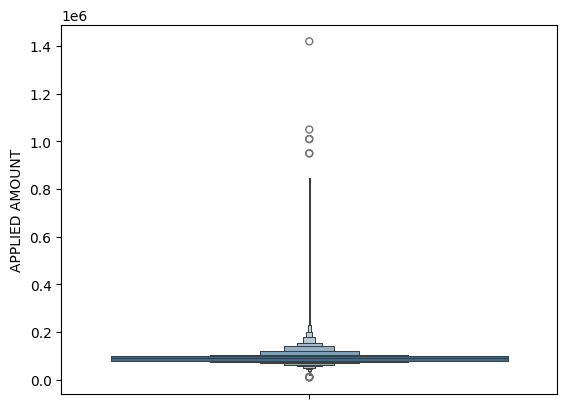

In [70]:
sns.boxenplot(df['APPLIED AMOUNT'])

### ploting data distribution for Applied amount

<Axes: xlabel='APPLIED AMOUNT', ylabel='Count'>

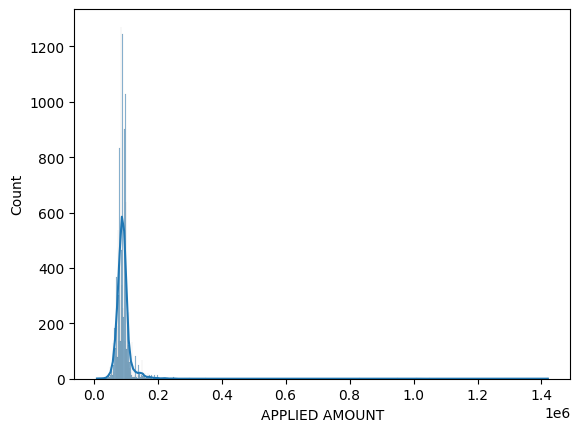

In [71]:
sns.histplot(df['APPLIED AMOUNT'],kde=True)

### handling the outliers

In [72]:
Q1 = df['APPLIED AMOUNT'].quantile(0.25)
Q3 = df['APPLIED AMOUNT'].quantile(0.85)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['APPLIED AMOUNT'] < lower_bound) | (df['APPLIED AMOUNT'] > upper_bound)]
median = df['APPLIED AMOUNT'].median()


In [73]:
outliers.shape

(499, 32)

In [74]:
outliers['APPLIED AMOUNT'].max()

1420000

In [75]:
median

90000.0

In [76]:
df.loc[(df['APPLIED AMOUNT'] < lower_bound) | (df['APPLIED AMOUNT'] > upper_bound), 'APPLIED AMOUNT'] = median

<Axes: ylabel='APPLIED AMOUNT'>

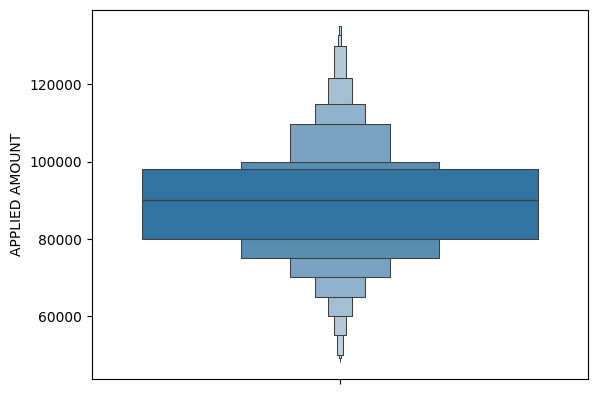

In [77]:
sns.boxenplot(df['APPLIED AMOUNT'])

In [78]:
df['PRIMARY ASSET MAKE'].head()

0    HONDA MOTORS
1     HERO MOTORS
2    TVS MOTOR CO
3     HERO MOTORS
4    HONDA MOTORS
Name: PRIMARY ASSET MAKE, dtype: object

In [79]:
df['Primary Asset Model No'].value_counts()

Primary Asset Model No
ACTIVA 6G DLX BSVI                    855
SPLENDOR PLUS SELF DRUM BSVI I3S      826
SPLENDOR PLUS XTEC BSVI               635
SPLENDOR PLUS SELF START DRUM BSVI    630
SP 125 DISC BS VI                     530
                                     ... 
VESPA SXL 125 BSVI                      1
VESPA VXL 125 BSVI                      1
JAWA DUAL CHANNEL ABS BSVI              1
BULLET 350 EFI BLACK BSVI               1
GRAZIA SPORTS EDITION BSVI              1
Name: count, Length: 276, dtype: int64

In [80]:
df.iloc[:,:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AADHAR VERIFIED         12000 non-null  object 
 1   Cibil Score             12000 non-null  float64
 2   MOBILE VERIFICATION     12000 non-null  bool   
 3   TOTAL ASSET COST        12000 non-null  float64
 4   ASSET CTG               12000 non-null  object 
 5   ASSET MODEL NO          12000 non-null  int64  
 6   APPLIED AMOUNT          12000 non-null  int64  
 7   PRIMARY ASSET MAKE      12000 non-null  object 
 8   Primary Asset Model No  12000 non-null  object 
 9   MARITAL STATUS          12000 non-null  object 
 10  GENDER                  12000 non-null  object 
 11  DOB                     12000 non-null  int64  
 12  AGE                     12000 non-null  int64  
 13  ADDRESS TYPE            12000 non-null  object 
 14  EMPLOY CONSTITUTION     12000 non-null

In [81]:
df.iloc[:,15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Phone Social Premium.amazon          12000 non-null  float64
 1   Phone Social Premium.byjus           12000 non-null  float64
 2   Phone Social Premium.flipkart        12000 non-null  float64
 3   Phone Social Premium.housing         12000 non-null  float64
 4   Phone Social Premium.indiamart       12000 non-null  float64
 5   Phone Social Premium.instagram       12000 non-null  float64
 6   Phone Social Premium.jeevansaathi    12000 non-null  float64
 7   Phone Social Premium.microsoft       12000 non-null  float64
 8   Phone Social Premium.paytm           12000 non-null  float64
 9   Phone Social Premium.shaadi          12000 non-null  float64
 10  Phone Social Premium.skype           12000 non-null  float64
 11  Phone Social Premium.toi    

### Encoding the categorical variables

In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [83]:
onehot_categories = ['EMPLOY CONSTITUTION', 'ASSET CTG','PRIMARY ASSET MAKE','ADDRESS TYPE',
                     'phone_phoneFootprintStrengthOverall']

In [84]:
df['ASSET CTG'].value_counts()

ASSET CTG
MCECA    8324
SCECA    1488
MCEXA    1415
SCEXA     311
MCPRA     150
MCECB      81
MOECA      78
MCECC      50
ESECB      34
MCEXB      33
ESNRC      24
EMECA      11
ESNRB       1
Name: count, dtype: int64

In [85]:
df['EMPLOY CONSTITUTION'].value_counts()

EMPLOY CONSTITUTION
Unknown          5992
SELF-EMPLOYED    4180
SALARIED         1828
Name: count, dtype: int64

In [86]:
df["ADDRESS TYPE"].value_counts()

ADDRESS TYPE
OWNED               6711
RESIDENCE           2629
PARENTAL            2144
RENTED               503
COMPANY_PROVIDED      13
Name: count, dtype: int64

In [87]:
label_categories = ['GENDER', 'MARITAL STATUS','AADHAR VERIFIED','MOBILE VERIFICATION']

In [88]:
onehot_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df[onehot_categories])
onehot_columns = onehot_encoder.get_feature_names_out(onehot_categories)
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns, index=df.index)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
df= pd.concat([df.drop(columns=onehot_categories), df_onehot], axis=1)

In [90]:
df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,Primary Asset Model No,MARITAL STATUS,GENDER,DOB,...,ADDRESS TYPE_COMPANY_PROVIDED,ADDRESS TYPE_OWNED,ADDRESS TYPE_PARENTAL,ADDRESS TYPE_RENTED,ADDRESS TYPE_RESIDENCE,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,NO,726.000000,True,95041.0,139542,85000,SHINE DRUM BSVI,Married,Male,1041978,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,NO,706.409298,True,94423.0,140208,90000,SPLENDOR PLUS SELF DRUM BSVI I3S,Married,Male,1011997,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NO,737.000000,True,119436.0,160001,75000,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,9081999,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,NO,713.000000,True,87000.0,160832,78500,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,3071998,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NO,669.000000,True,94423.0,174641,70000,DIO STD BSVI,Married,Male,5071989,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [91]:
label_encoder = LabelEncoder()
for col in label_categories:
    df[col] = label_encoder.fit_transform(df[col].astype(str))
    

In [92]:
df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,Primary Asset Model No,MARITAL STATUS,GENDER,DOB,...,ADDRESS TYPE_COMPANY_PROVIDED,ADDRESS TYPE_OWNED,ADDRESS TYPE_PARENTAL,ADDRESS TYPE_RENTED,ADDRESS TYPE_RESIDENCE,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low
0,0,726.000000,0,95041.0,139542,85000,SHINE DRUM BSVI,0,1,1041978,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,706.409298,0,94423.0,140208,90000,SPLENDOR PLUS SELF DRUM BSVI I3S,0,1,1011997,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,737.000000,0,119436.0,160001,75000,TVS NTORQ SUPER SQUAD EDITION BSVI,1,1,9081999,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,713.000000,0,87000.0,160832,78500,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,1,1,3071998,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,669.000000,0,94423.0,174641,70000,DIO STD BSVI,0,1,5071989,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [93]:
df.columns

Index(['AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION',
       'TOTAL ASSET COST', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'Primary Asset Model No', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.microsoft',
       'Phone Social Premium.paytm', 'Phone Social Premium.shaadi',
       'Phone Social Premium.skype', 'Phone Social Premium.toi',
       'Phone Social Premium.zoho', 'phone_digitalage', 'phone_nameMatchScore',
       'SOCIAL_MEDIA_COUNT', 'EMPLOY CONSTITUTION_SALARIED',
       'EMPLOY CONSTITUTION_SELF-EMPLOYED', 'EMPLOY CONSTITUTION_Unknown',
       'ASSET CTG_EMECA', 'ASSET CTG_ESECB', 'ASSET CTG_ESNRB',
       'ASSET CTG_ESNRC', 'ASSET CTG_MCECA', 'ASSET CTG_MCECB',
       'ASSET CTG_MCECC', 'A

In [94]:
df['ASSET MODEL NO'].value_counts()

ASSET MODEL NO
143240    855
140208    826
199546    635
140212    630
129101    530
         ... 
143629      1
142946      1
156064      1
145114      1
166972      1
Name: count, Length: 278, dtype: int64

In [95]:
df[['Primary Asset Model No','ASSET MODEL NO']]

,Primary Asset Model No,ASSET MODEL NO
0,SHINE DRUM BSVI,139542
1,SPLENDOR PLUS SELF DRUM BSVI I3S,140208
2,TVS NTORQ SUPER SQUAD EDITION BSVI,160001
3,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,160832
4,DIO STD BSVI,174641
...,...,...
11995,STARCITY PLUS DUAL TONE BSVI,138469
11996,PLATINA 110 ES DRUM BSVI,180580
11997,SPORT KICK START LONG SEAT BSVI,143233
11998,SPLENDOR PLUS SELF DRUM BSVI I3S,140208


### As Primary Asset model number and Asset model Number specifies the similar features so I am droping the Primary Asset model number

In [96]:
df=df.drop(columns=['Primary Asset Model No'])

### creating one more feature Loan amount to asset ratio for more betterment

In [97]:
df['LOAN_TO_ASSET_RATIO'] = df['APPLIED AMOUNT'] / df['TOTAL ASSET COST']

### I am droping the DOB column as it does not impact much and we have age feature to better understand this data

In [98]:
df=df.drop(columns=['DOB'])

### Standerdizing and normalizing the features

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
standardize_cols = ['Cibil Score', 'TOTAL ASSET COST', 'APPLIED AMOUNT','ASSET MODEL NO' ,'AGE', 'phone_digitalage', 'phone_nameMatchScore', 'LOAN_TO_ASSET_RATIO']
normalize_cols = ['SOCIAL_MEDIA_COUNT']

In [101]:
scaler=StandardScaler()
df[standardize_cols]=scaler.fit_transform(df[standardize_cols])

In [102]:
df.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,Phone Social Premium.amazon,...,ADDRESS TYPE_OWNED,ADDRESS TYPE_PARENTAL,ADDRESS TYPE_RENTED,ADDRESS TYPE_RESIDENCE,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low,LOAN_TO_ASSET_RATIO
0,0,4.233157e-01,0,-0.080491,-0.537447,-0.311477,0,1,1.084073,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.295992
1,0,2.456544e-15,0,-0.132981,-0.505701,0.069654,0,1,-0.616749,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.151138
2,0,6.610036e-01,0,1.991511,0.437767,-1.073739,1,1,-0.885300,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.321529
3,0,1.424118e-01,0,-0.763458,0.477379,-0.806948,1,1,-0.706266,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.235561
4,0,-8.083397e-01,0,-0.132981,1.135609,-1.454871,0,1,0.099386,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.459355


In [103]:
scaler2=MinMaxScaler()

In [104]:
df[normalize_cols]=scaler2.fit_transform(df[normalize_cols])

### Dividing the test data and train data as i have concatinated at the first

In [105]:
test_data= df.tail(2000)

In [106]:
test_data.head()

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,Phone Social Premium.amazon,...,ADDRESS TYPE_OWNED,ADDRESS TYPE_PARENTAL,ADDRESS TYPE_RENTED,ADDRESS TYPE_RESIDENCE,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low,LOAN_TO_ASSET_RATIO
10000,0,1.093163e+00,0,-0.054076,-0.361127,-0.082798,0,1,2.158276,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.078951
10001,0,9.419075e-01,0,-1.751173,0.749270,-1.073739,0,1,0.905039,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.469872
10002,0,7.758786e-02,0,-0.085417,-0.795753,0.298333,1,1,-0.616749,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.348560
10003,0,-2.465320e-01,0,-0.132981,-0.342728,0.450785,0,1,0.188903,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.553761
10004,0,2.456544e-15,0,-0.485124,-0.327427,-0.463929,1,1,-0.706266,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.105591


In [107]:
test_data.shape

(2000, 69)

In [108]:
train_data= df.iloc[:-2000]

In [109]:
train_data

,AADHAR VERIFIED,Cibil Score,MOBILE VERIFICATION,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,Phone Social Premium.amazon,...,ADDRESS TYPE_OWNED,ADDRESS TYPE_PARENTAL,ADDRESS TYPE_RENTED,ADDRESS TYPE_RESIDENCE,phone_phoneFootprintStrengthOverall_High,phone_phoneFootprintStrengthOverall_Low,phone_phoneFootprintStrengthOverall_Medium,phone_phoneFootprintStrengthOverall_Very High,phone_phoneFootprintStrengthOverall_Very Low,LOAN_TO_ASSET_RATIO
0,0,4.233157e-01,0,-0.080491,-0.537447,-0.311477,0,1,1.084073,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.295992
1,0,2.456544e-15,0,-0.132981,-0.505701,0.069654,0,1,-0.616749,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.151138
2,0,6.610036e-01,0,1.991511,0.437767,-1.073739,1,1,-0.885300,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.321529
3,0,1.424118e-01,0,-0.763458,0.477379,-0.806948,1,1,-0.706266,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.235561
4,0,-8.083397e-01,0,-0.132981,1.135609,-1.454871,0,1,0.099386,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.459355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,2.456544e-15,0,-0.596135,0.477379,-0.159025,0,1,-0.885300,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.338942
9996,0,2.456544e-15,0,2.039414,1.538107,0.069654,0,1,1.621174,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.393547
9997,0,2.456544e-15,0,-0.514682,-0.361175,-0.006572,0,1,0.636488,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.428753
9998,0,2.456544e-15,0,-0.564709,0.477379,-0.311477,0,1,1.710691,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.137938


### Creating the x and y variable for train data

In [110]:
x=train_data

In [111]:
y=df_train[target]

In [112]:
y.value_counts()

Application Status
APPROVED    6677
DECLINED    3323
Name: count, dtype: int64

In [113]:
type(y)

pandas.core.series.Series

### converting the categorical variables into numerical data in the target variable

In [114]:
y = y.map({'APPROVED': 1, 'DECLINED': 0})

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


### spliting the data into training and testing

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Trying with different models and also handling imbalanced data

##### Creating a evaluation function so that we can use the same function for evauating different models

In [117]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

#### 1. Random Forest with balanced subsample

In [118]:
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [119]:
evaluate_model(model, X_test, y_test)

accuracy score: 0.8655
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       673
           1       0.91      0.89      0.90      1327

    accuracy                           0.87      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
[[ 553  120]
 [ 149 1178]]
ROC AUC Score: 0.9508017839567067


In [120]:
from sklearn.linear_model import LogisticRegression

#### 2. Resampling with SMOTE and using Logistic Regression

In [121]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

print("Results with SMOTE:")
evaluate_model(model_smote, X_test, y_test)

Results with SMOTE:
accuracy score: 0.847
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       673
           1       0.96      0.80      0.87      1327

    accuracy                           0.85      2000
   macro avg       0.83      0.87      0.84      2000
weighted avg       0.87      0.85      0.85      2000

Confusion Matrix:
[[ 628   45]
 [ 261 1066]]
ROC AUC Score: 0.9427162006156284


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3. Class balancing with Logistic Regression

In [122]:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)

print("\nResults with Class Weighting:")
evaluate_model(model_weighted, X_test, y_test)


Results with Class Weighting:
accuracy score: 0.8505
              precision    recall  f1-score   support

           0       0.71      0.95      0.81       673
           1       0.97      0.80      0.88      1327

    accuracy                           0.85      2000
   macro avg       0.84      0.88      0.84      2000
weighted avg       0.88      0.85      0.85      2000

Confusion Matrix:
[[ 641   32]
 [ 267 1060]]
ROC AUC Score: 0.9427184400792322


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Combining techniques: SMOTE + Random Forest

In [123]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

print("\nResults with SMOTE + Random Forest:")
evaluate_model(pipeline, X_test, y_test)


Results with SMOTE + Random Forest:
accuracy score: 0.8575
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       673
           1       0.93      0.85      0.89      1327

    accuracy                           0.86      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
[[ 584   89]
 [ 196 1131]]
ROC AUC Score: 0.9469241527269389


In [124]:
from xgboost import XGBClassifier

### 5. Using XGBoost and Smote

In [125]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [126]:
xgb_model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
)


In [127]:
xgb_model.fit(
    X_train_resampled, 
    y_train_resampled, 
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
evaluate_model(xgb_model, X_test, y_test)

accuracy score: 0.8585
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       673
           1       0.92      0.86      0.89      1327

    accuracy                           0.86      2000
   macro avg       0.84      0.86      0.85      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix:
[[ 573  100]
 [ 183 1144]]
ROC AUC Score: 0.9497296407564461


### From all the above models Random Forest Classifier with balanced subsample gives the better accuracy so I am considering this model

In [129]:
final_model= RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [130]:
final_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [131]:
evaluate_model(final_model,X_test,y_test)

accuracy score: 0.8655
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       673
           1       0.91      0.89      0.90      1327

    accuracy                           0.87      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.87      0.87      0.87      2000

Confusion Matrix:
[[ 553  120]
 [ 149 1178]]
ROC AUC Score: 0.9508017839567067


### HYPERPARAMETER TUNING to better improve accuracy

### using grid search for hyperparameter tuning

#### Grid 1: Selecting n_estimators

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
param_grid1 = {'class_weight':['balanced_subsample'],
    
          'n_estimators':[300, 500, 700, 900, 1100, 1300]
         }

final_model = RandomForestClassifier()
grid1 = GridSearchCV(estimator=final_model, param_grid=param_grid1, n_jobs=-1, cv=3, verbose=1, scoring = 'accuracy')
grid1.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'n_estimators': [300, 500, 700, 900, 1100, 1300]},
             scoring='accuracy', verbose=1)

In [134]:
grid1.best_params_

{'class_weight': 'balanced_subsample', 'n_estimators': 500}

In [135]:
grid1.best_score_

0.875125371144061

#### Grid 2: Selecting max depth and split criterion

In [138]:
param_grid2 = {
        'class_weight':['balanced_subsample'],
          'n_estimators':[500],
           'criterion': ['entropy', 'gini'],    
          'max_depth': [23,24,25],
         }

final_model = RandomForestClassifier()
grid2 = GridSearchCV(estimator=final_model, param_grid=param_grid2, n_jobs=-1, cv=3, verbose=1, scoring = 'accuracy')
grid2.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [23, 24, 25], 'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [139]:
grid2.best_score_

0.8736251366928721

In [140]:
grid2.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 24,
 'n_estimators': 500}

#### Grid 3: Selecting minimum samples leaf and split

In [145]:
param_grid3 = {
        'class_weight':['balanced_subsample'],
          'n_estimators':[500],
           'criterion': ['entropy'],    
          'max_depth': [24],
          'min_samples_leaf': [1,2,3],
          'min_samples_split': [2,3]
         }

final_model = RandomForestClassifier()
grid3 = GridSearchCV(estimator=final_model, param_grid=param_grid3, n_jobs=-1, cv=3, verbose=1, scoring = 'accuracy')
grid3.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['entropy'], 'max_depth': [24],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3], 'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [146]:
grid3.best_score_

0.8715000272377806

In [147]:
grid3.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

#### grid 4 :Selecting Class weight

In [148]:
param_grid4 = {

        'class_weight':['balanced_subsample'],
          'n_estimators':[500],
           'criterion': ['entropy'],    
          'max_depth': [224],
          'min_samples_leaf': [1],
          'min_samples_split': [2],
          'class_weight':[{0:1, 1:1}, {0:1, 1:2}, {0:1, 1:3}],
         }

final_model = RandomForestClassifier()
grid4 = GridSearchCV(estimator=final_model, param_grid=param_grid4, n_jobs=-1, cv=3, verbose=1, scoring = 'accuracy')
grid4.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['entropy'], 'max_depth': [224],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [500]},
             scoring='accuracy', verbose=1)

In [149]:
grid4.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'entropy',
 'max_depth': 224,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [150]:
grid4.best_score_

0.8751252773823377

### Selecting the best parameters for Random forest classifier from the above method

In [151]:
model = RandomForestClassifier( class_weight={0: 1, 1: 3},
                       criterion='entropy', max_depth=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=700,
                     
                      )

In [152]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=25, n_estimators=700)

In [153]:
from sklearn.metrics import roc_auc_score,roc_curve

### Creating a Prediction function for the evaluation purpose

In [154]:

def prediction(model, X_train,y_train ,X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print (model)
    print ("\n Classification report : \n",classification_report(y_test,predictions))
    print ("Accuracy   Score : ",accuracy_score(y_test,predictions))
    conf_matrix = confusion_matrix(y_test,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    model_roc_auc = roc_auc_score(y_test,probabilities) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,probabilities)
    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
   
    plt.show()
    
    

RandomForestClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=25, n_estimators=700)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       673
           1       0.90      0.91      0.90      1327

    accuracy                           0.87      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.87      0.87      0.87      2000

Accuracy   Score :  0.8695
Area under curve :  0.95087680598743 



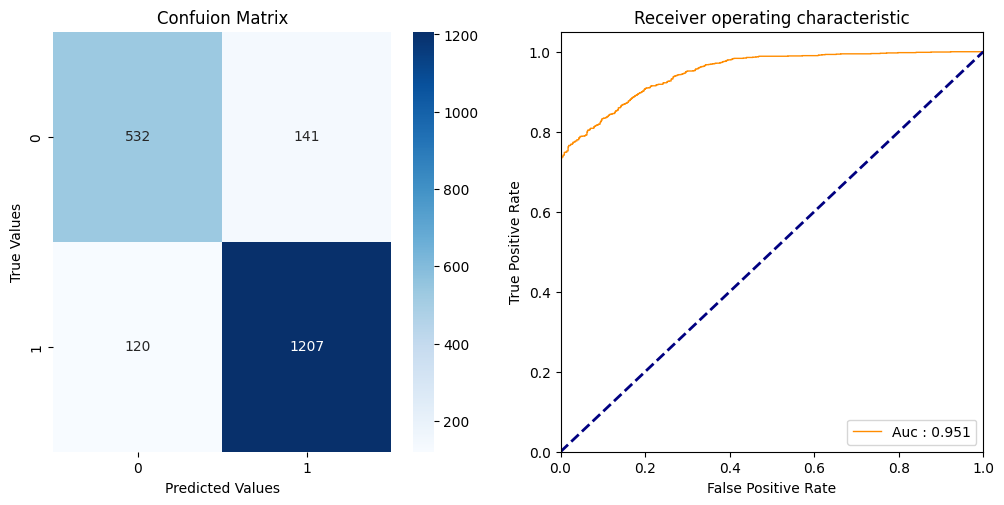

In [155]:
prediction(model,X_train,y_train,X_test,y_test)

### Getting a predtictions for Assignment_test data as i have preprocessed befor and stored in a test_data variable

In [156]:
pred=model.predict(test_data)

In [157]:
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [158]:
len(pred)

2000

In [159]:
df_test['UID']

0       1844045271814558464
1       1840349097823778816
2       1488102613362294272
3        555529923942874624
4       1010213070486150912
               ...         
1995    1595862360559879424
1996     879889749720017664
1997     242909456443720192
1998     138725642700761856
1999    1680321200653072640
Name: UID, Length: 2000, dtype: int64

In [160]:
uid=df_test['UID'].to_numpy()

### creating a dataframe with UID and application status features

In [161]:
new_df = pd.DataFrame({
    'UID': uid,
    'Prediction': pred
})

In [162]:
new_df.head()

,UID,Prediction
0,1844045271814558464,1
1,1840349097823778816,1
2,1488102613362294272,1
3,555529923942874624,0
4,1010213070486150912,1


In [163]:
new_df['Prediction'] = new_df['Prediction'].map({1:'APPROVED', 0:'DECLINED'})

In [164]:
new_df.head()

,UID,Prediction
0,1844045271814558464,APPROVED
1,1840349097823778816,APPROVED
2,1488102613362294272,APPROVED
3,555529923942874624,DECLINED
4,1010213070486150912,APPROVED


### Storing this dataframe to predictions.csv file as mentioned in the assignment with UID columns and Prediction

In [165]:
new_df.to_csv('predictions.csv')